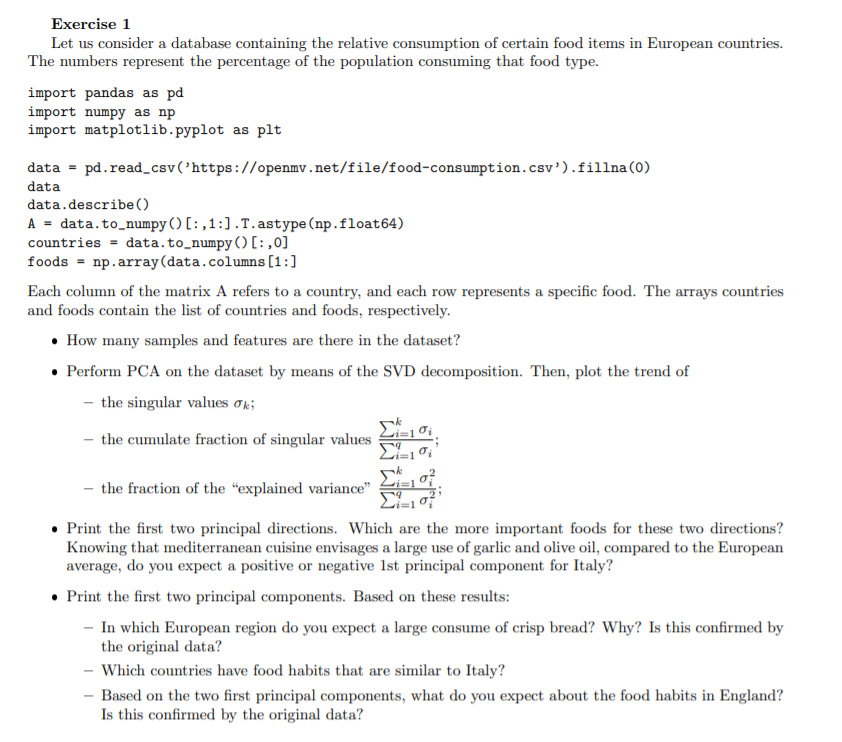

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('https://openmv.net/file/food-consumption.csv').fillna(0)
data
data.describe()
A = data.to_numpy()[:,1:].T.astype(np.float64)
countries = data.to_numpy()[:,0]
foods = np.array(data.columns[1:])


In [2]:
data

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,Frozen veggies,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
0,Germany,90,49,88,19.0,57.0,51,19,21,27,21,81,75,44,71,22,91,85,74,30.0,26
1,Italy,82,10,60,2.0,55.0,41,3,2,4,2,67,71,9,46,80,66,24,94,5.0,18
2,France,88,42,63,4.0,76.0,53,11,23,11,5,87,84,40,45,88,94,47,36,57.0,3
3,Holland,96,62,98,32.0,62.0,67,43,7,14,14,83,89,61,81,15,31,97,13,53.0,15
4,Belgium,94,38,48,11.0,74.0,37,23,9,13,12,76,76,42,57,29,84,80,83,20.0,5
5,Luxembourg,97,61,86,28.0,79.0,73,12,7,26,23,85,94,83,20,91,94,94,84,31.0,24
6,England,27,86,99,22.0,91.0,55,76,17,20,24,76,68,89,91,11,95,94,57,11.0,28
7,Portugal,72,26,77,2.0,22.0,34,1,5,20,3,22,51,8,16,89,65,78,92,6.0,9
8,Austria,55,31,61,15.0,29.0,33,1,5,15,11,49,42,14,41,51,51,72,28,13.0,11
9,Switzerland,73,72,85,25.0,31.0,69,10,17,19,15,79,70,46,61,64,82,48,61,48.0,30


In [3]:
A.shape #20features, 16 samples

(20, 16)

In [4]:
A_mean = np.mean(A, axis=1)
A_std = np.std(A, axis=1)
A_norm = A-A_mean[:,None]
A_mean.shape

(20,)

Text(0.5, 1.0, 'Explained Variance')

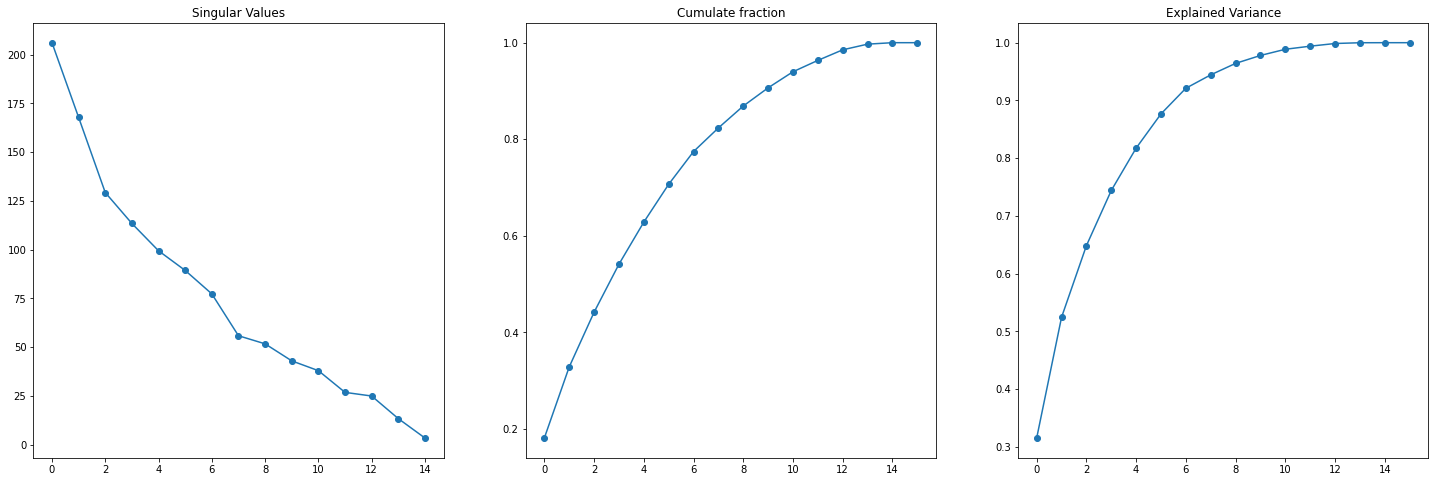

In [5]:
U,s,VT = np.linalg.svd(A_norm, full_matrices = False)

fig, axs = plt.subplots(1, 3, figsize=(25,8))
axs = axs.flatten()

axs[0].plot(s[:-1], '-o')
axs[0].set_title("Singular Values")

axs[1].plot((np.cumsum(s)/np.sum(s)), '-o')
axs[1].set_title("Cumulate fraction")

axs[2].plot((np.cumsum(s**2)/np.sum(s**2)), '-o')
axs[2].set_title("Explained Variance")


In [6]:
U.shape, s.shape, VT.shape

((20, 16), (16,), (16, 16))

In [7]:
pd1 = U[:,0]
pd2 = U[:,1]
print("Most important food for direction 1: ", foods[np.argmax(pd1)])
print("Most important food for direction 2: ", foods[np.argmax(pd2)])

Most important food for direction 1:  Garlic
Most important food for direction 2:  Instant coffee


In [8]:
print("            PD1                PD2            Foods: \n ",np.c_[pd1,pd2,foods]) 

            PD1                PD2            Foods: 
  [[0.03798526991885831 -0.18194258637082908 'Real coffee']
 [-0.13378619675263256 0.4550904068283057 'Instant coffee']
 [-0.26878980290797705 -0.007871951832461914 'Tea']
 [-0.16044660311207112 -0.018023016327544807 'Sweetener']
 [-0.11954423525347674 0.3598369354908243 'Biscuits']
 [-0.08332812969833817 0.23387602314308775 'Powder soup']
 [-0.28509817160670037 0.12460295680912468 'Tin soup']
 [-0.056791188239141976 -0.04784198844278397 'Potatoes']
 [-0.09552422549600675 -0.1533666900500859 'Frozen fish']
 [-0.14474104445322 -0.08188076454435216 'Frozen veggies']
 [-0.126029569006341 0.24472339613924282 'Apples']
 [-0.04027136267843485 0.13248793255819133 'Oranges']
 [-0.2960814869924977 0.3016167595361977 'Tinned fruit']
 [-0.33615172598860293 0.07463048524492175 'Jam']
 [0.5715263946149102 0.26561426051825543 'Garlic']
 [-0.104271758258224 0.10933454764323029 'Butter']
 [-0.1772132479579952 0.04342564235651467 'Margarine']
 [0.34

In [9]:
Phi = U.T @ A_norm
Phi[:,0]

array([-2.25817979e+01,  1.15678637e+01, -1.55903825e+01,  6.07152480e+00,
        1.16057371e+01,  3.35499608e+00, -1.10021341e+01, -2.60889359e+01,
        1.60235615e+01,  5.60571854e+00,  7.75547627e+00,  8.02738160e+00,
       -6.14215605e+00,  1.49977538e+00, -1.98467317e+00,  1.38083989e-15])

In [10]:
foods[np.argmin(pd2)]

'Crisp bread'

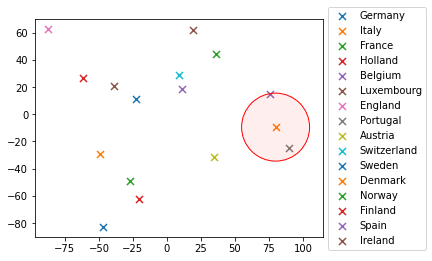

In [11]:
for i in range(Phi.shape[1]):
  plt.scatter(Phi[0,i], Phi[1,i] ,marker='x', s=50, label=countries[i])

ax = plt.gca()
ax.add_patch(plt.Circle((Phi[0,countries=='Italy'], Phi[1,countries=='Italy']),facecolor='#FF000011', edgecolor='red',radius = 25))
ax.set_aspect('equal')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))